In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime




In [2]:
working_df= pd.read_csv("cleaned_car_accidents.csv")
working_df.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,200520D002602,-1.832342,52.534986,2,1,3,01/01/2005,7,20:23,300,...,1,1,1,1,-1,-1,3,0,9,1
1,200520D002703,-1.846293,52.465961,3,2,2,02/01/2005,1,18:45,300,...,2,1,1,1,31,6,3,0,9,1
2,200520D004203,-1.794089,52.455003,3,1,1,03/01/2005,2,17:04,300,...,1,1,1,1,24,5,3,0,9,1
3,200520D004603,-1.869954,52.478755,1,1,2,05/01/2005,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
4,200520D006503,-1.857470,52.469211,3,2,1,05/01/2005,4,22:00,300,...,2,1,1,2,22,5,3,0,9,1


In [3]:
working_df.shape

(68311, 55)

In [4]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68311 entries, 0 to 68310
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Accident_Index                           68311 non-null  object 
 1   Longitude                                68311 non-null  float64
 2   Latitude                                 68311 non-null  float64
 3   Accident_Severity                        68311 non-null  int64  
 4   Number_of_Vehicles                       68311 non-null  int64  
 5   Number_of_Casualties                     68311 non-null  int64  
 6   Date                                     68311 non-null  object 
 7   Day_of_Week                              68311 non-null  int64  
 8   Time                                     68311 non-null  object 
 9   Local_Authority_(District)               68311 non-null  int64  
 10  1st_Road_Class                           68311

In [5]:
working_df.describe()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
count,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,...,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000
mean,-1.897209,52.492207,2.856451,1.850288,1.371624,4.118678,302.792786,4.463161,1268.857007,4.931138,...,1.470232,1.026496,1.551068,1.392250,32.474389,5.764899,2.870343,0.125836,6.496289,0.940449
std,0.172846,0.060632,0.376019,0.670148,0.817911,1.924740,3.099256,1.497184,1871.996418,1.713476,...,0.528104,0.206966,0.823011,0.488256,18.517720,2.484937,0.358852,0.413438,6.727738,0.534120
min,-2.203214,52.348078,1.000000,1.000000,1.000000,1.000000,300.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000
25%,-2.013377,52.447660,3.000000,1.000000,1.000000,2.000000,300.000000,3.000000,0.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,20.000000,4.000000,3.000000,0.000000,1.000000,1.000000
50%,-1.910877,52.485477,3.000000,2.000000,1.000000,4.000000,302.000000,4.000000,34.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,29.000000,6.000000,3.000000,0.000000,9.000000,1.000000
75%,-1.830438,52.531750,3.000000,2.000000,1.000000,6.000000,305.000000,6.000000,4040.000000,6.000000,...,2.000000,1.000000,2.000000,2.000000,44.000000,7.000000,3.000000,0.000000,9.000000,1.000000
max,-1.428223,52.662124,3.000000,12.000000,42.000000,7.000000,309.000000,6.000000,5127.000000,9.000000,...,9.000000,6.000000,3.000000,2.000000,100.000000,11.000000,3.000000,2.000000,90.000000,3.000000


In [6]:
unique =working_df["Vehicle_Type"].unique()
unique

array([ 9, 11, 21,  8, 20,  2, 19,  4,  1, 90,  3,  5, 10, 17],
      dtype=int64)

In [7]:
#Determining the type of vehicle involved in an accident, and the severity impact of the accident
severity_by_vehicle_type = working_df.groupby(['Vehicle_Type','Accident_Severity']).size()
severity_by_vehicle_type

Vehicle_Type  Accident_Severity
1             1                       18
              2                      359
              3                     1789
2             1                        3
              2                      105
              3                      394
3             1                        9
              2                      256
              3                      611
4             1                        8
              2                       85
              3                      158
5             1                       47
              2                      306
              3                      462
8             1                       11
              2                      217
              3                     1582
9             1                      419
              2                     6316
              3                    46705
10            1                        3
              2                       32
              3          

In [8]:
#total number of vehicles involved in an accident
total_vehicles = working_df.groupby('Accident_Index',)['Number_of_Vehicles'].sum()
total_vehicles

Accident_Index
200520D002602    1
200520D002703    2
200520D004203    1
200520D004603    1
200520D006503    2
                ..
201420Z500064    1
201420Z500084    2
201420Z500104    2
201420Z500244    2
201420Z625594    2
Name: Number_of_Vehicles, Length: 68311, dtype: int64

In [9]:
#Defining the type_mapping dictionary
type_mapping = {
1: 'Pedal cycle',                    
2:'Motorcycle 50cc and under',            
3:'Motorcycle 125cc and under',           
4:'Motorcycle over 125cc and up to 500cc', 
5:'Motorcycle over 500cc',                
8:'Taxi/Private hire car',               
9:'Car',                                  
10:'Minibus (8 - 16 passenger seats)',     
11:'Bus or coach (17 or more pass seats)', 

16:'Ridden horse',                       
17:'Agricultural vehicle',                
18:'Tram',                                
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',      
21:'Goods 7.5 tonnes mgw and over',       
22:'Mobility scooter',                   
23:'ElecElectric motorcycle',              
90:'Other vehicle',                   
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight',      
-1:'Data missing or out of range',        
}

type_mapping = {1:'Pedal cycle', 2:'Motorcycle 50cc and under', 3:'Motorcycle 125cc and under', 
                4:'Motorcycle over 125cc and up to 500cc', 5:'Motorcycle over 500cc', 8:'Taxi/Private hire car',
                9:'Car', 10: 'Minibus (8 - 16 passenger seats)', 11:'Bus or coach (17 or more pass seats)',
                16:'Ridden horse', 17:'Agricultural vehicle', 18:'Tram', 19:'Van / Goods 3.5 tonnes mgw or under',
                20:'Goods over 3.5t. and under 7.5t', 21:'Goods 7.5 tonnes mgw and over', 22:'Mobility scooter',
                23:'Electric motorcycle', 90:'Other vehicle', 97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight',
                -1:'Data missing or out of range'}
vehicle_df = working_df[working_df['Vehicle_Type'].isin(type_mapping.keys())]
vehicle_df['Vehicle_Type']=vehicle_df['Vehicle_Type'].replace(type_mapping)
vehicle_df
                    
                    















,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,200520D002602,-1.832342,52.534986,2,1,3,01/01/2005,7,20:23,300,...,1,1,1,1,-1,-1,3,0,9,1
1,200520D002703,-1.846293,52.465961,3,2,2,02/01/2005,1,18:45,300,...,2,1,1,1,31,6,3,0,9,1
2,200520D004203,-1.794089,52.455003,3,1,1,03/01/2005,2,17:04,300,...,1,1,1,1,24,5,3,0,9,1
3,200520D004603,-1.869954,52.478755,1,1,2,05/01/2005,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
4,200520D006503,-1.857470,52.469211,3,2,1,05/01/2005,4,22:00,300,...,2,1,1,2,22,5,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,201420Z500064,-1.937139,52.552170,3,1,1,21/12/2014,1,18:05,305,...,1,1,3,1,44,7,3,0,0,1
68307,201420Z500084,-1.852342,52.505975,3,2,3,23/12/2014,3,18:30,300,...,1,1,1,1,28,6,3,0,9,1
68308,201420Z500104,-1.860138,52.509850,3,2,1,28/12/2014,1,16:45,300,...,2,1,1,2,54,8,3,0,9,1
68309,201420Z500244,-1.871192,52.509054,3,2,2,04/09/2014,5,09:20,300,...,1,1,1,1,40,7,3,0,19,-1


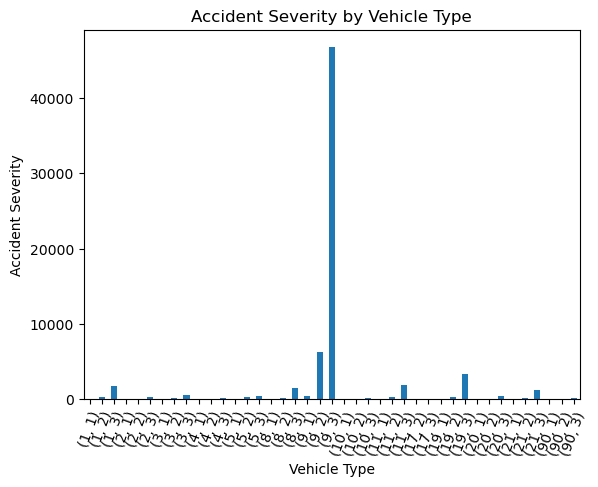

In [10]:
# create a bar chat
severity_by_vehicle_type.plot(kind='bar')
plt.title('Accident Severity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Accident Severity')
plt.xticks(rotation=70)


plt.show()

In [11]:
severity_mapping = {1:'High', 2:'Medium', 3:'Low'}

#Apply the mapping using replace()
working_df['Accident_Severity'] = working_df['Accident_Severity'].replace(severity_mapping)
working_df


,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,200520D002602,-1.832342,52.534986,Medium,1,3,01/01/2005,7,20:23,300,...,1,1,1,1,-1,-1,3,0,9,1
1,200520D002703,-1.846293,52.465961,Low,2,2,02/01/2005,1,18:45,300,...,2,1,1,1,31,6,3,0,9,1
2,200520D004203,-1.794089,52.455003,Low,1,1,03/01/2005,2,17:04,300,...,1,1,1,1,24,5,3,0,9,1
3,200520D004603,-1.869954,52.478755,High,1,2,05/01/2005,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
4,200520D006503,-1.857470,52.469211,Low,2,1,05/01/2005,4,22:00,300,...,2,1,1,2,22,5,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,201420Z500064,-1.937139,52.552170,Low,1,1,21/12/2014,1,18:05,305,...,1,1,3,1,44,7,3,0,0,1
68307,201420Z500084,-1.852342,52.505975,Low,2,3,23/12/2014,3,18:30,300,...,1,1,1,1,28,6,3,0,9,1
68308,201420Z500104,-1.860138,52.509850,Low,2,1,28/12/2014,1,16:45,300,...,2,1,1,2,54,8,3,0,9,1
68309,201420Z500244,-1.871192,52.509054,Low,2,2,04/09/2014,5,09:20,300,...,1,1,1,1,40,7,3,0,19,-1


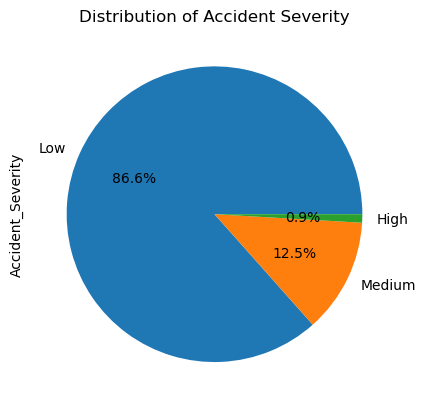

In [15]:

#Generate a pie plot showing the allocation of High, Medium and low accident using pandas
accident_data=working_df["Accident_Severity"].value_counts()
plt.title("Distribution of Accident Severity")
accident_data.plot.pie(autopct="%1.1f%%")
plt.show()